# Analysis of YouTube Video Trending Data

## Yutao Xie

8/19/2019

Introduction to Computational Literary Analysis

UC-Berkeley, Summer 2019

Instructor: Jonathan Reeve

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd Project

E:\Python\Project


## The data is from kaggle: Trending YouTube Video Statistics. https://www.kaggle.com/datasnaek/youtube-new/downloads/youtube-new.zip/115

## Data Description (Quoted From Website Above)
### Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of this dataset.

### Content
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

EDIT: Now includes data from RU, MX, KR, JP and IN regions (Russia, Mexico, South Korea, Japan and India respectively) over the same time period.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.

### Acknowledgements
This dataset was collected using the YouTube API.

### Inspiration
Possible uses for this dataset could include:

Sentiment analysis in a variety of forms
Categorising YouTube videos based on their comments and statistics.
Training ML algorithms like RNNs to generate their own YouTube comments.
Analysing what factors affect how popular a YouTube video will be.
Statistical analysis over time.

## Motivation
After learning this course, I find most part of what we have already learned is to treat the text as a dataset then do some data science things. My other course is data 100. So I'm considering combining these two things (data science and text analysis).  
I choose this dataset because it has both digital records like the number of views, likes, dislikes, etc. and textual records like video titles and descriptions. So I can do data science things while using textual analysis. 

## Data Importing and Preprocessing

In [3]:
df_us = pd.read_csv('USvideos.csv', error_bad_lines=False)
df_gb = pd.read_csv('GBvideos.csv', error_bad_lines=False)

We need to let the computer know what each record in time columns ('trending_date' and 'publish_time') means by converting their formats. 

In [4]:
df_us.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df_us['trending_date'] = pd.to_datetime(df_us['trending_date'], format='%y.%d.%m')
df_us['publish_time'] = pd.to_datetime(df_us['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_us.insert(4, 'publish_date', df_us['publish_time'].dt.date)
df_us['publish_time'] = df_us['publish_time'].dt.time
df_us['publish_date'] = pd.to_datetime(df_us['publish_date'])

In [6]:
df_us.head(3)

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


Below is visualization (correlation matrix) of the correlation among the likes, dislikes, comment counts, and views of every video. 

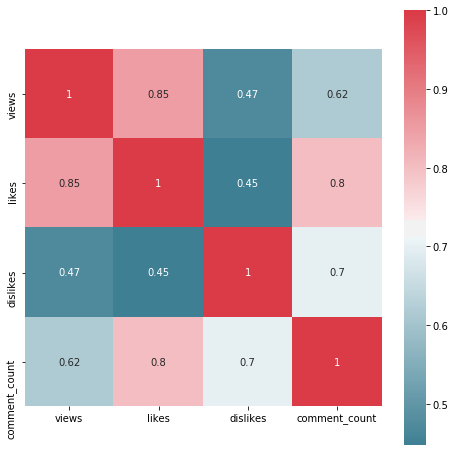

In [7]:
columns_show = ['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df_us[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

We can get many interpretations if we look into the four attributes of a video (likes, dislikes, views and comment count). So we extract them first. 

In [8]:
usVideoViews = df_us.groupby(['video_id'])['views'].agg('sum')
usVideoLikes = df_us.groupby(['video_id'])['likes'].agg('sum')
usVideoDislikes = df_us.groupby(['video_id'])['dislikes'].agg('sum')
usVideoCommentCount = df_us.groupby(['video_id'])['comment_count'].agg('sum')

A video can be trended for only one day or several days. We can look into this. 

In [9]:
usSingleDayTrend = df_us.drop_duplicates(subset='video_id', keep=False, inplace=False)
usMultipleDayTrend = df_us.drop_duplicates(subset='video_id', keep='first', inplace=False)

frames = [usSingleDayTrend, usMultipleDayTrend]
usWithoutDuplicates = pd.concat(frames)

In [10]:
usSingleDayTrend.shape[0]

707

In [11]:
usMultipleDayTrend.shape[0]

6351

We are also interested in those videos that are comments disabled, rating disabled, or video errored. 

In [12]:
usCommentDisabled = usWithoutDuplicates[usWithoutDuplicates['comments_disabled']==True].describe()
usRatingDisabled = usWithoutDuplicates[usWithoutDuplicates['ratings_disabled']==True].describe()
usVideoError = usWithoutDuplicates[usWithoutDuplicates['video_error_or_removed']==True].describe()

Which video was trended for the most days? 

In [13]:
usMostDayTrending = df_us.groupby(['video_id'], as_index=False).count().sort_values('title', ascending=False).head()
usMostDayTrending

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4666,j4KvrAUjn6c,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
2312,MAjY8mCTXWk,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
5479,r-3iathMo7o,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2730,QBL8IRJ5yHU,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
964,8h--kFui1JA,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29


Substitute video ids with video titles.

In [77]:
a = df_us.merge(usMostDayTrending, on='video_id').groupby(['title_x']).count().sort_values('title_y', ascending=False).head()

In [78]:
a

,video_id,trending_date_x,channel_title_x,publish_date_x,category_id_x,publish_time_x,tags_x,views_x,likes_x,dislikes_x,...,tags_y,views_y,likes_y,dislikes_y,comment_count_y,thumbnail_link_y,comments_disabled_y,ratings_disabled_y,video_error_or_removed_y,description_y
title_x,,,,,,,,,,,,,,,,,,,,,
WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Sam Smith - Pray (Official Video) ft. Logic,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
"The ULTIMATE $30,000 Gaming PC Setup",29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
Why I'm So Scared (being myself and crying too much),29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV",28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


Text(0.5, 1.0, 'Top 5 Videos That Trended Maximum Days in US')

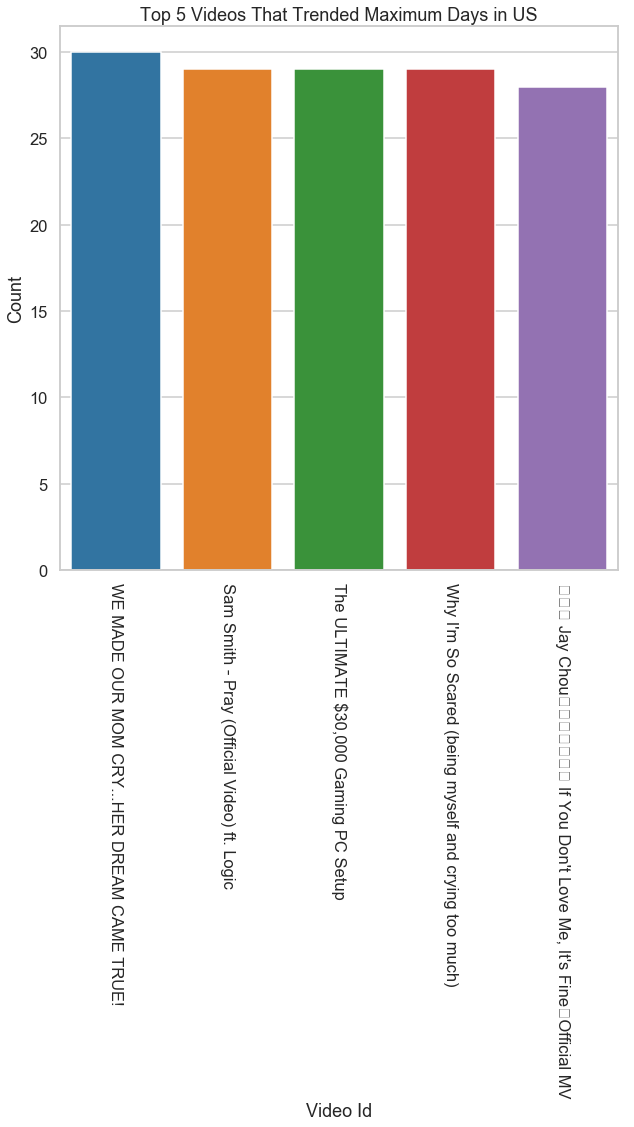

In [97]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.set_context('talk')
ax = sns.barplot(x=a.index, y=a['trending_date_x'], data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
plt.xlabel('Video Id')
plt.ylabel('Count')
plt.title("Top 5 Videos That Trended Maximum Days in US")

Finally we got the top 5 videos that were trended for longest time. The squares are Chinese characters that can't be displayed. We can see there are 2 music videos and the other 3 are of various kinds. 

So we can say music videos are more likely to be trended. 

Then we can save the four attributes of video that was trended for the most days. 

In [15]:
usMostViews = usVideoViews['j4KvrAUjn6c']
usMostLikes = usVideoLikes['j4KvrAUjn6c']
usMostDislikes = usVideoDislikes['j4KvrAUjn6c']
usMostCommentCount = usVideoCommentCount['j4KvrAUjn6c']

We can get the distribution of category ids of these videos. 

In [16]:
usCategoryId = usWithoutDuplicates.groupby(['category_id'], as_index=False).count().sort_values('title', ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 Category Ids in US Videos')

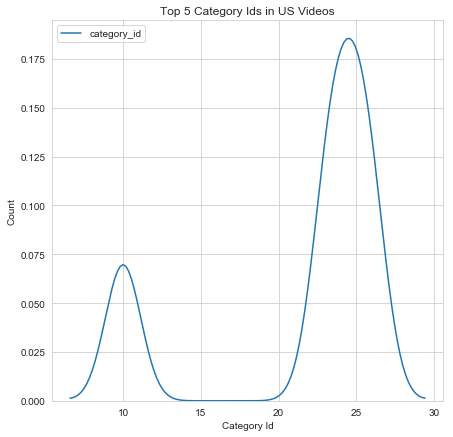

In [17]:
plt.figure(figsize=(7,7))
sns.kdeplot(usCategoryId['category_id'])
plt.xlabel('Category Id')
plt.ylabel('Count')
plt.title("Top 5 Category Ids in US Videos")

This graph shows that the maximum category id is 24 and the category ids are majorly between 22-27. 

## Text Analysis

In [18]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

def wc(data, bgcolor, title):
    plt.figure(figsize=(100,100))
    wc = WordCloud(background_color=bgcolor, max_words=1000, max_font_size=50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [19]:
%pip install stop-words

Note: you may need to restart the kernel to use updated packages.


### Count the word frequency of video titles.

In [20]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

Text(0.5, 1.0, 'Top 7 Words That are The Most Frequent in Video Titles')

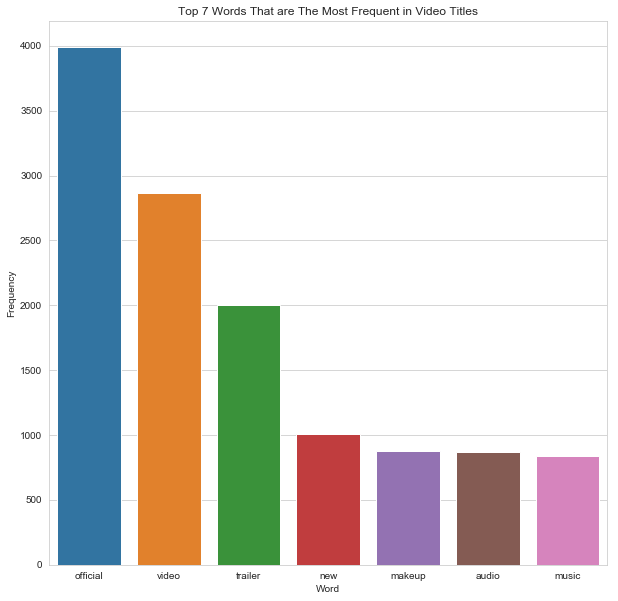

In [21]:
top_N = 100
a = df_us['title'].str.lower().str.cat(sep=' ')
# Remove punctuation and numbers
b = re.sub('[^A-Za-z]+', ' ', a)
# Remove stopwords
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens = nltk.word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
# Remove characters which have length less than 2
without_single_chr = [word for word in filtered_sentence if len(word)>2]
# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
# Get frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
result = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
ax = sns.barplot(x='Word', y='Frequency', data=result.head(7))
plt.title('Top 7 Words That are The Most Frequent in Video Titles')

### WordCloud for Video Titles

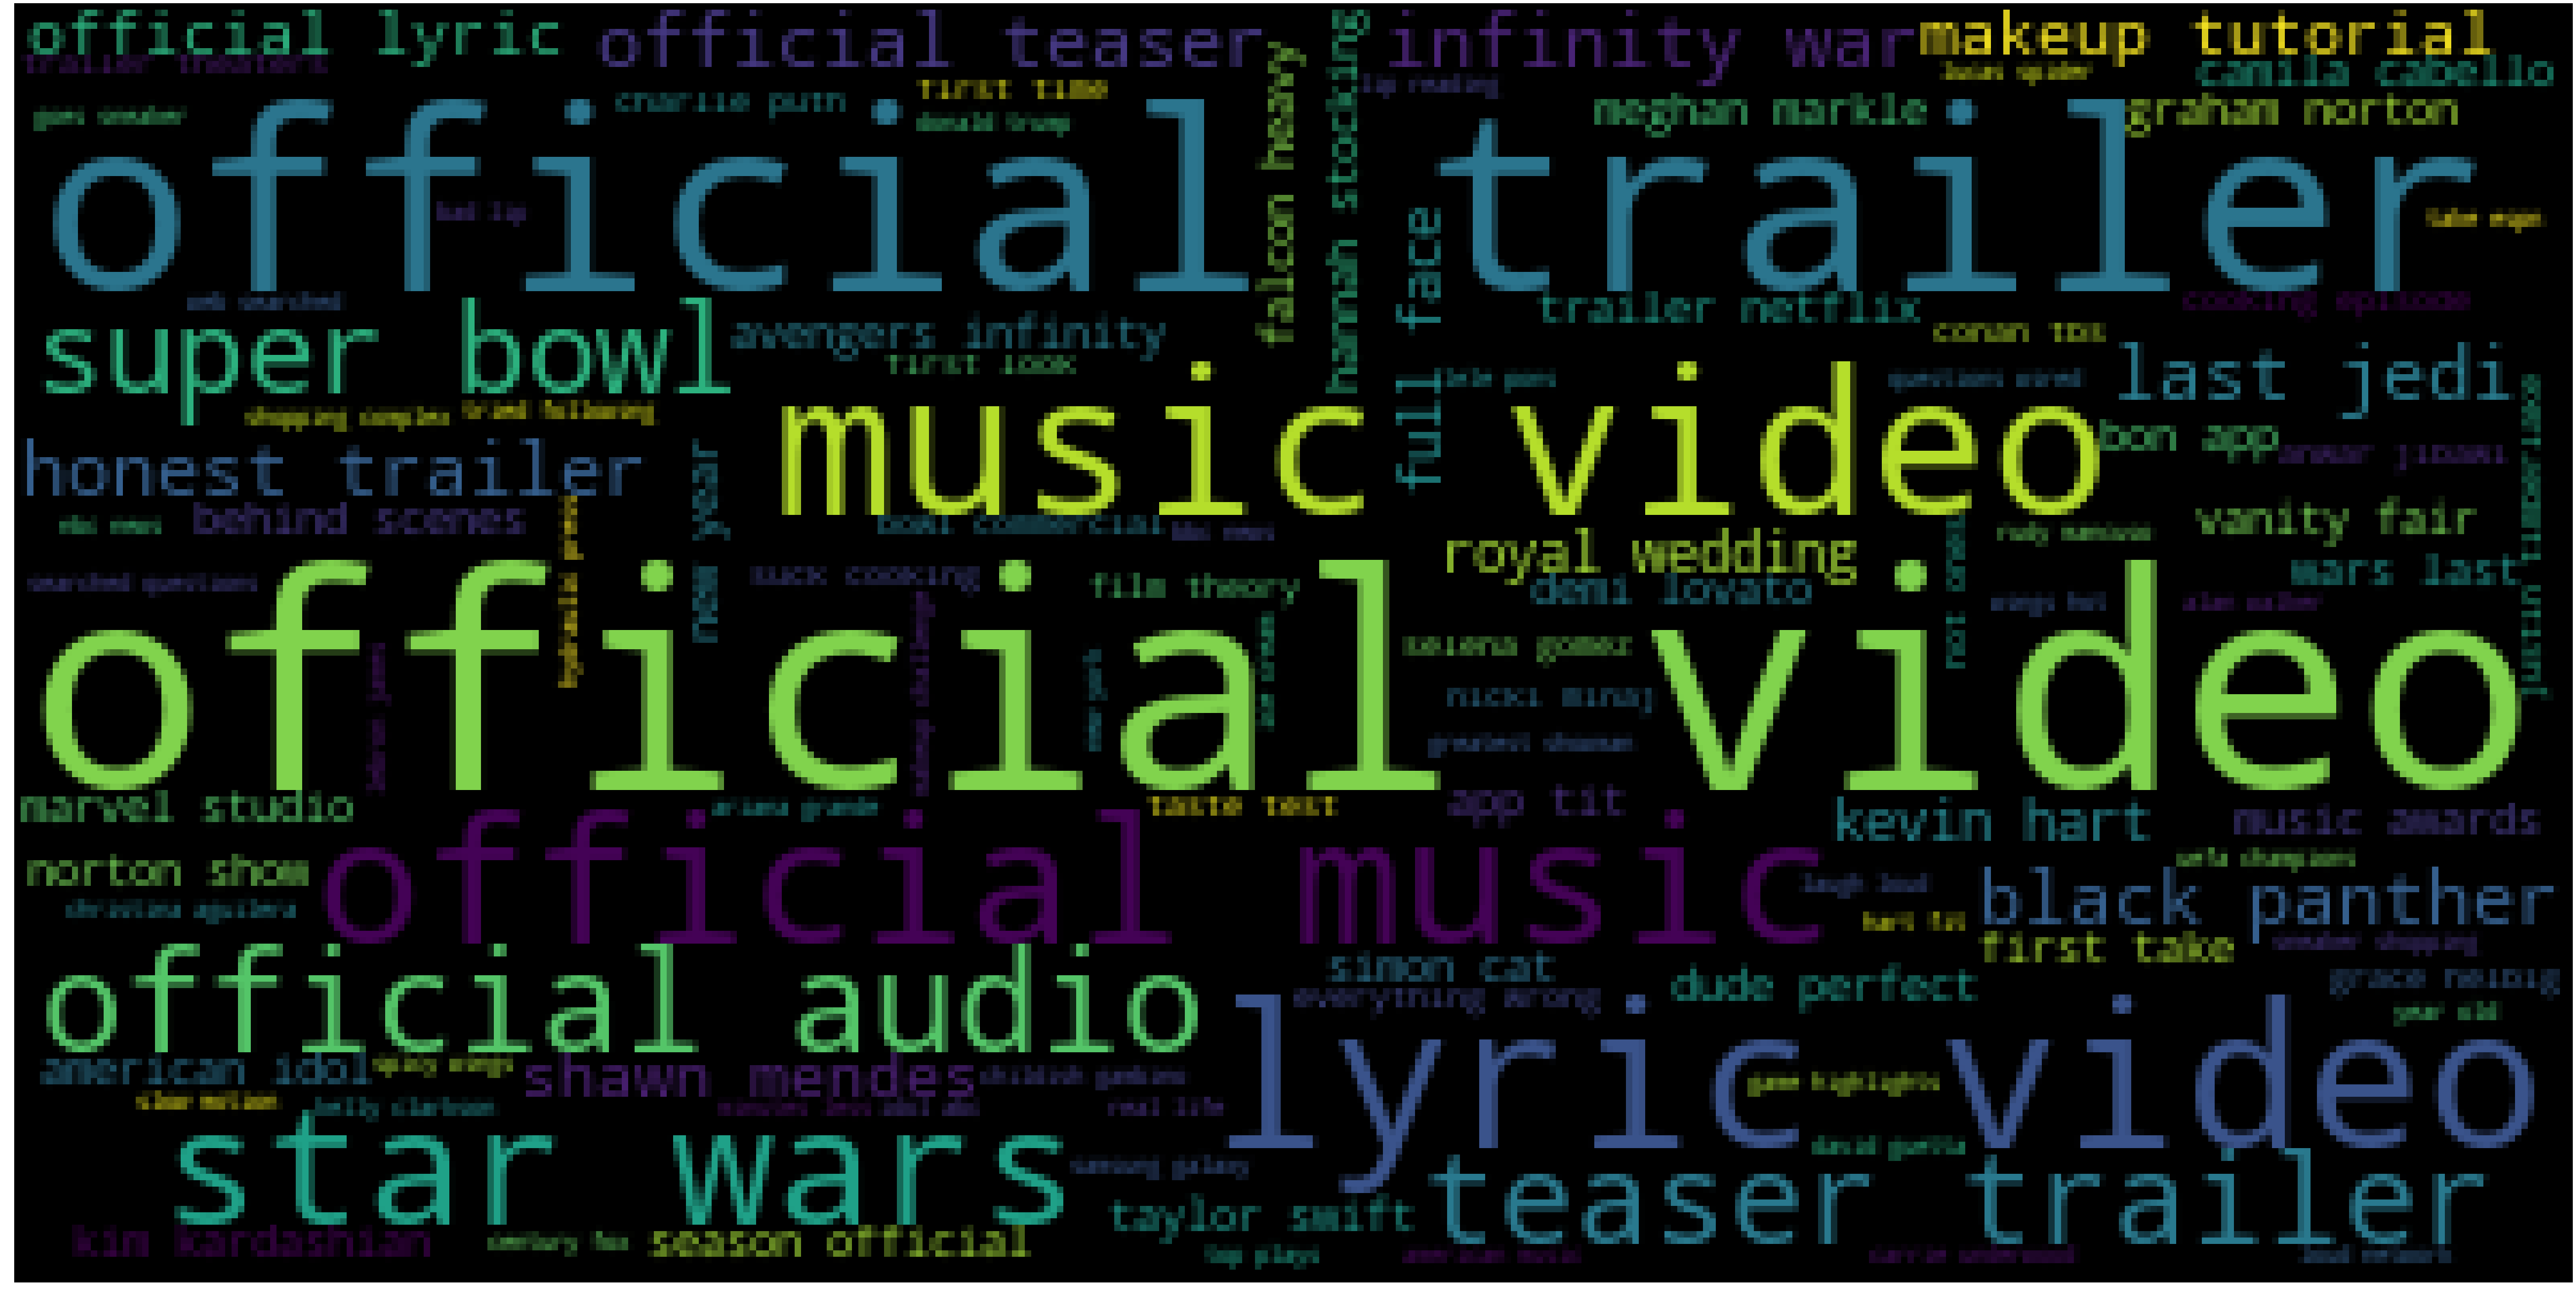

In [22]:
wc(cleaned_data_title, 'black', 'Common Words')

We can see 'official', 'music', 'video', 'audio','trailer' are words that appear the most frequently. And these words are all about music videos. This conclusion is the same as the conclusion we draw from the data science things above. 

### Word frequency and WordCloud for video descriptions. 

Text(0.5, 1.0, 'Top 7 Words That are The Most Frequent in Video Descriptions')

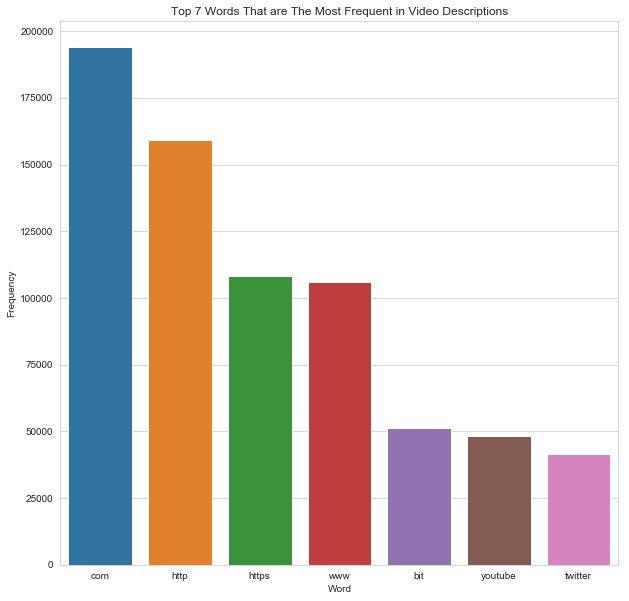

In [23]:
desc_lower = df_us['description'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_desc = nltk.word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))
plt.title('Top 7 Words That are The Most Frequent in Video Descriptions')

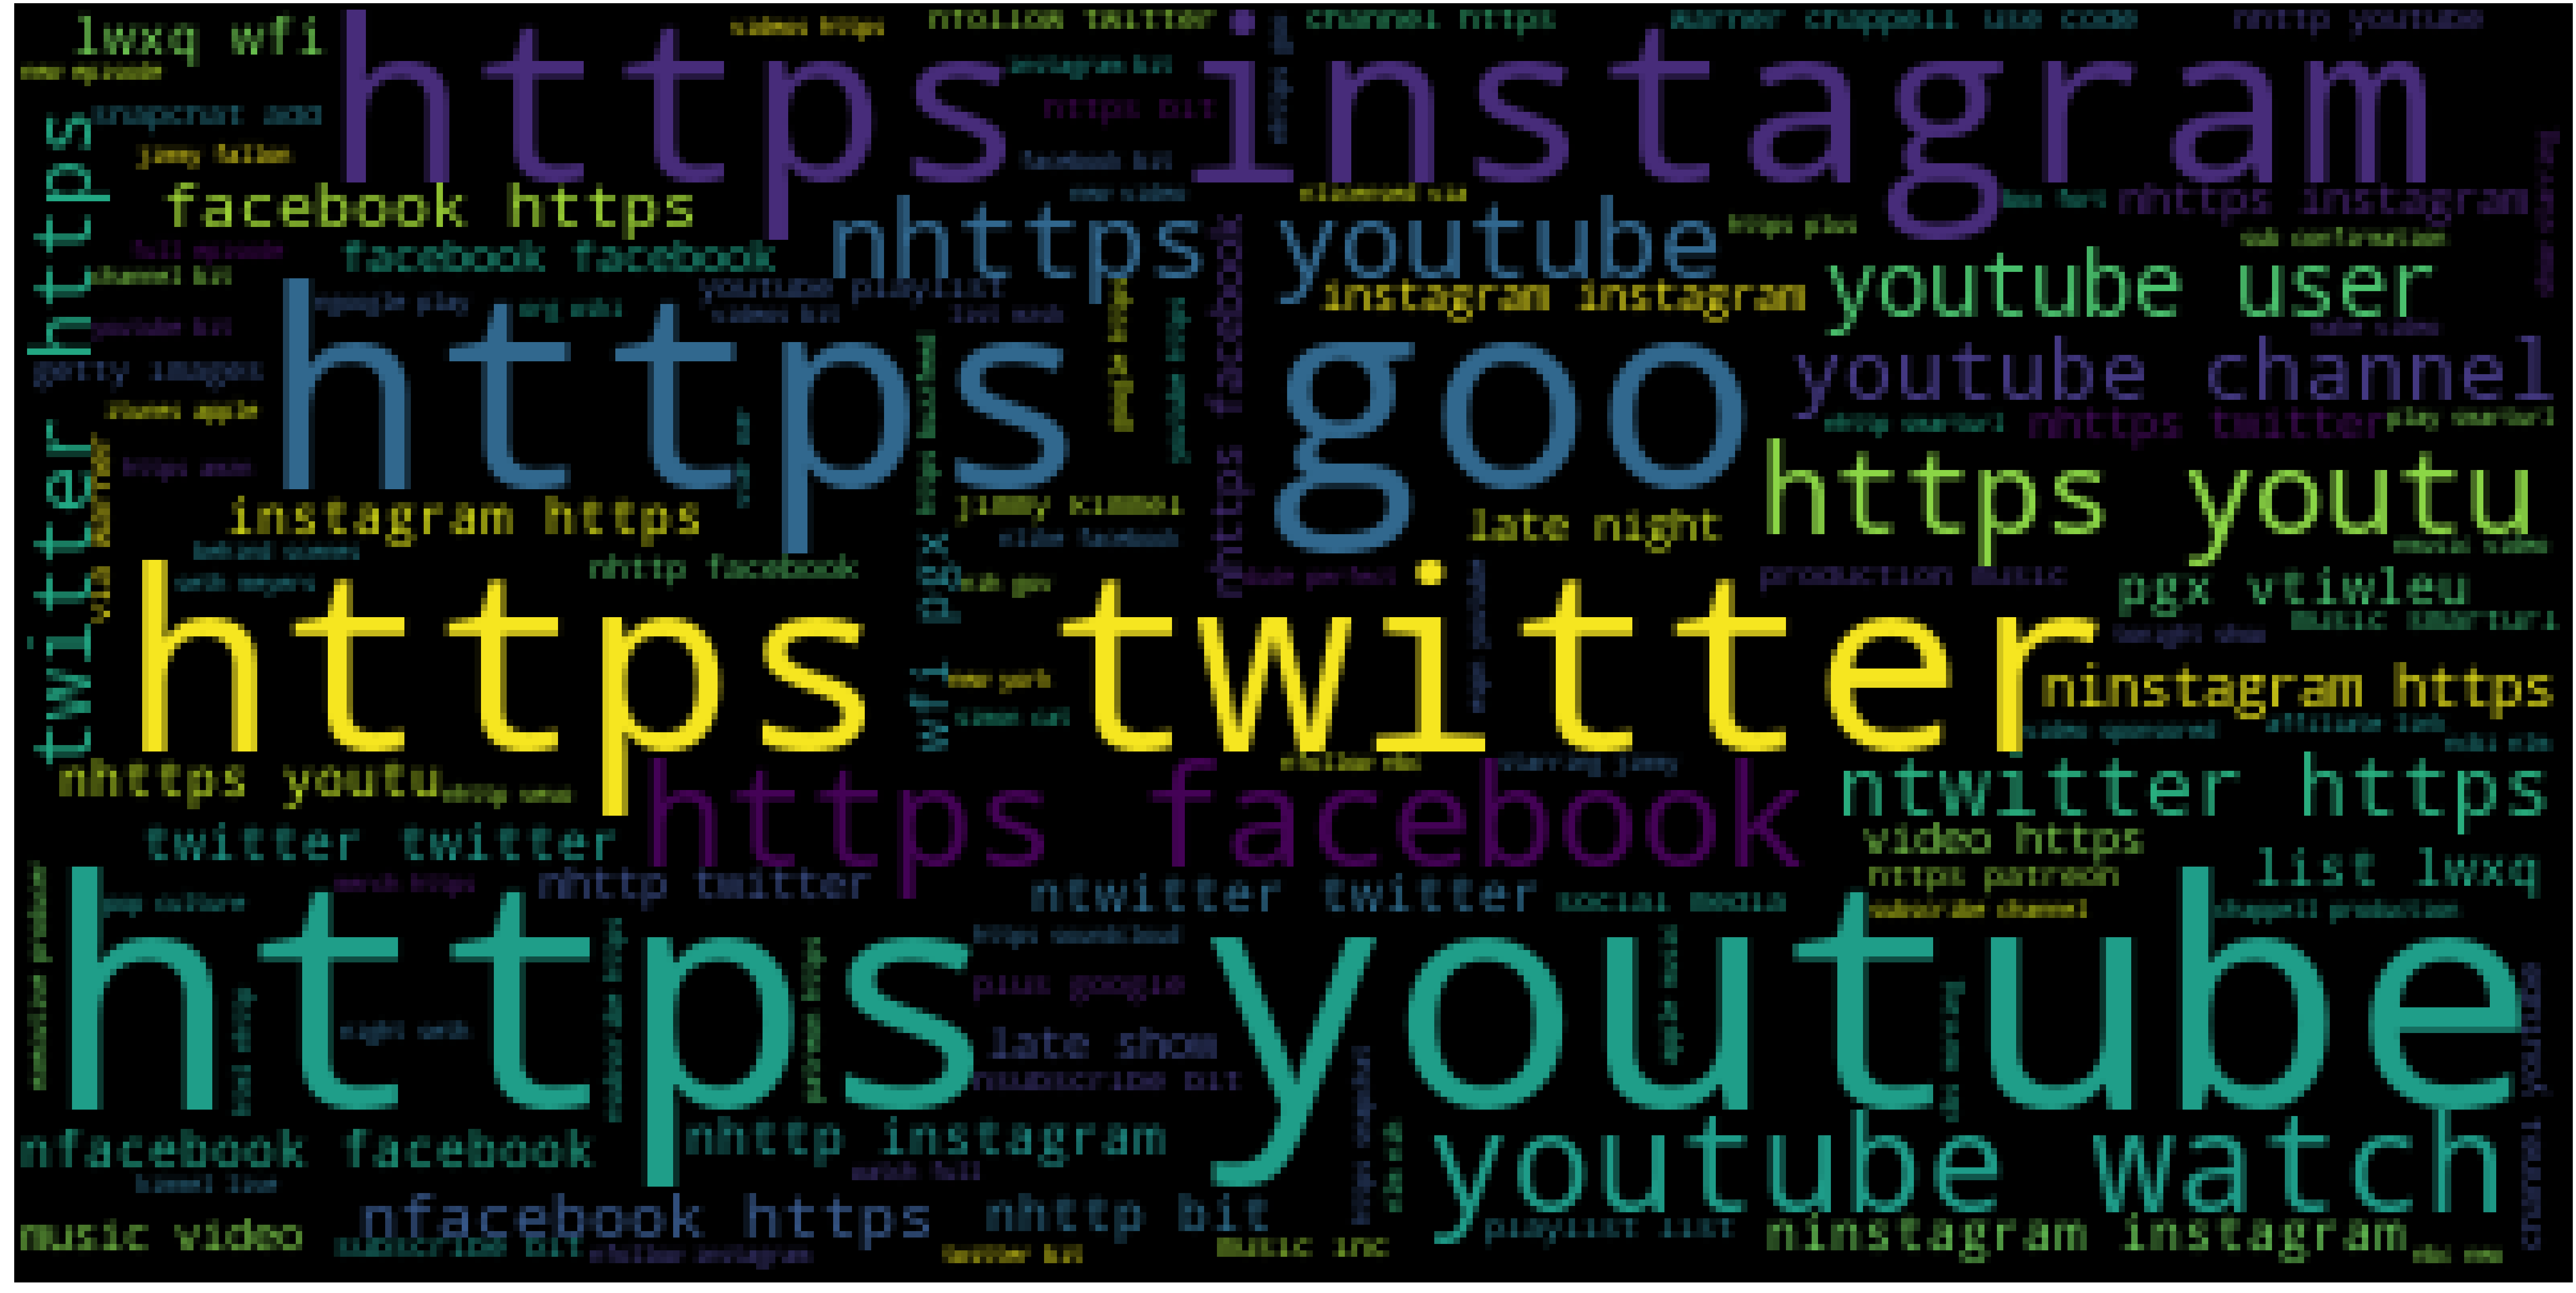

In [24]:
wc(cleaned_data_desc, 'black', 'Frequent Words')

We can see 'https', 'goo', 'com', 'http', 'www' that appear most frequently. Because these words are components of websites. And we know that normally YouTubers will enclose websites of their contacts (Twitter, Facebook, Instagram, etc. We can see these words in the wordcloud too) in their video descriptions. 

## Sentiment Analysis

### Categorize the video descriptions into positive and negative sentiments by textblob

TextBlob is an interesting and convenient tool that can judge how positive one sentence or word is. The test result is comprised of two values: polarity and subjectivity. Positive polarity value means this sentence is positive and vise versa. 0 means it's neutral. Subjectivity means how subject the sentence is. 

In [25]:
from textblob import TextBlob

bloblist_desc = list()

df_us_desc_str = df_us['description'].astype(str)
for row in df_us_desc_str:
    blob = TextBlob(row)
    bloblist_desc.append((row, blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_us_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence', 'sentiment', 'polarity'])

In [26]:
df_us_polarity_desc.head(3)

,sentence,sentiment,polarity
0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.166667,0.494444
1,"One year after the presidential election, John...",0.079167,0.345833
2,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.145833,0.333333


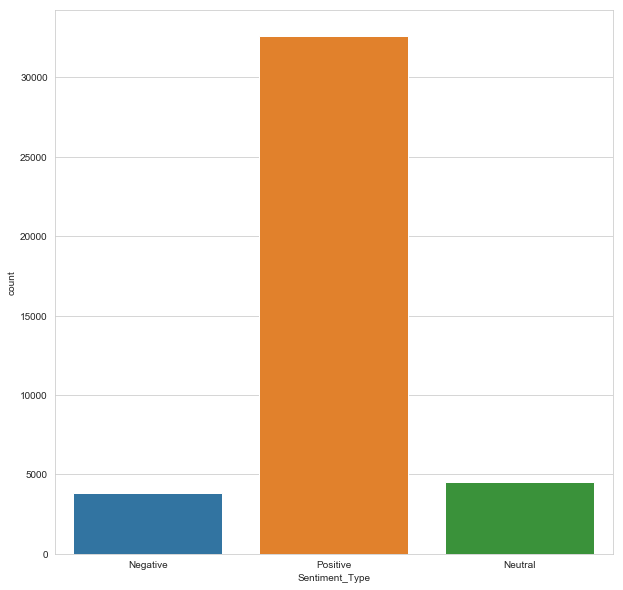

In [27]:
def f(df_us_polarity_desc):
    val = ''
    if df_us_polarity_desc['sentiment']>0:
        val = 'Positive'
    elif df_us_polarity_desc['sentiment']==0:
        val = 'Neutral'
    else:
        val = 'Negative'
    return val

df_us_polarity_desc['Sentiment_Type'] = df_us_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
ax = sns.countplot(x='Sentiment_Type', data=df_us_polarity_desc)

We can see there are way more YouTube videos are positive at least in terms of their descriptions. But there is still a problem: I didn't leave the websites enclosed out. If the websites are all judged as positive then the result is not so accurate. 